<a href="https://colab.research.google.com/github/namita-ach/SDS-Reviews/blob/main/ChiSquare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On Tutorial: Chi-Square Tests

In this tutorial, we will explore the concept of Chi-Square tests using Python. We will conduct various Chi-Square tests to determine associations between categorical variables.

## 1. Importing Necessary Libraries

We need to import the required libraries for statistical calculations and plotting.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import matplotlib.pyplot as plt

## 2. Chi-Square Test for Independence

### 2.1 Defining the Data
We start by defining a contingency table representing two categorical variables.


In [ ]:
# Defining the contingency table
data = [[207, 282, 241], [234, 242, 232]]

### 2.2 Performing the Chi-Square Test
We use the chi2_contingency function to perform the test and interpret the p-value.

In [ ]:
# Perform the Chi-Square test
stat, p, dof, expected = chi2_contingency(data)

# Set significance level
alpha = 0.05

# Output p-value and decision
print("p-value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p-value is 0.1031971404730939
Independent (H0 holds true)


## 3. Chi-Square Goodness of Fit Test

### 3.1 Observed and Expected Frequencies
Next, we conduct a goodness-of-fit test to see if a die is biased.

In [ ]:
# Observed frequencies from rolling a die
observed = np.array([115, 47, 41, 101, 200, 96])

# Expected frequencies (assuming a fair die)
expected = np.array([100, 100, 100, 100, 100, 100])

### 3.2 Calculating Chi-Square Statistic
We calculate the Chi-Square statistic manually and determine the critical value and p-value.

In [ ]:
# Calculate chi-square statistic
chi2_stat = np.sum((observed - expected)**2 / expected)

# Degrees of freedom (number of categories - 1)
df = len(observed) - 1

# Critical value for 10% significance level
critical_value = chi2.ppf(0.90, df)

# p-value calculation
p_value = 1 - chi2.cdf(chi2_stat, df)

# Output results
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"Critical Value at 10% significance level: {critical_value}")
print(f"p-value: {p_value}")

# Conclusion based on the statistic and critical value
if chi2_stat < critical_value:
    print("Fail to reject the null hypothesis: The die is unbiased.")
else:
    print("Reject the null hypothesis: The die is biased.")

Chi-squared Statistic: 165.32000000000002
Critical Value at 10% significance level: 9.236356899781123
p-value: 0.0
Reject the null hypothesis: The die is biased.


## 4. Chi-Square Test with Multiple Categories

### 4.1 Defining Observed Data
We define another contingency table representing counts from different machines.

In [ ]:
# Define the observed data for machines
data = np.array([
    [10, 102, 8],   # Machine 1
    [34, 161, 5],   # Machine 2
    [12, 79, 9],    # Machine 3
    [10, 60, 10]    # Machine 4
])

# Create a DataFrame for better visualization (optional)
df = pd.DataFrame(data, columns=['Too Thin', 'OK', 'Too Thick'],
                  index=['Machine 1', 'Machine 2', 'Machine 3', 'Machine 4'])

print("Observed Data:\n", df)

Observed Data:
            Too Thin   OK  Too Thick
Machine 1        10  102          8
Machine 2        34  161          5
Machine 3        12   79          9
Machine 4        10   60         10


### 4.2 Performing the Chi-Square Test
We perform the Chi-Square test and display results.

In [ ]:
# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(data)

# Display results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Determine if the result is significant at alpha = 0.05
alpha = 0.05
if chi2_stat > chi2.ppf(1 - alpha, dof):
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Chi-Square Statistic: 15.584353328056686
P-Value: 0.01616760116149423
Degrees of Freedom: 6
Expected Frequencies:
 [[ 15.84  96.48   7.68]
 [ 26.4  160.8   12.8 ]
 [ 13.2   80.4    6.4 ]
 [ 10.56  64.32   5.12]]
Reject the null hypothesis: There is a significant difference.


## 5. Chi-Square Test for Vaccination Data

### 5.1 Creating a Contingency Table
We create a contingency table to analyze vaccination status against recovery outcomes.

In [ ]:
# Create a contingency table for vaccination data
data = np.array([[150, 30],    # Vaccinated Recovered/Not Recovered
                 [80, 40]])   # Not Vaccinated Recovered/Not Recovered

# Display the contingency table as a DataFrame for clarity
contingency_table = pd.DataFrame(data,
                                  columns=['Recovered', 'Not Recovered'],
                                  index=['Vaccinated', 'Not Vaccinated'])
print("Contingency Table:\n", contingency_table)

Contingency Table:
                 Recovered  Not Recovered
Vaccinated            150             30
Not Vaccinated         80             40


## 5.2 Performing the Chi-Square Test
We perform the test and determine significance.

In [ ]:
# Perform the Chi-Square test on vaccination data
chi2_stat, p_value, dof, expected = chi2_contingency(data)

# Display results
print("\nChi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Determine significance level at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between vaccination and recovery.")
else:
    print("Fail to reject the null hypothesis: No significant association between vaccination and recovery.")


Chi-Square Statistic: 10.267857142857142
P-Value: 0.0013536793727780064
Degrees of Freedom: 1
Expected Frequencies:
 [[138.  42.]
 [ 92.  28.]]
Reject the null hypothesis: There is a significant association between vaccination and recovery.


### (Optional): Plotting Vaccination Data
We can visualize the vaccination data using a bar chart!

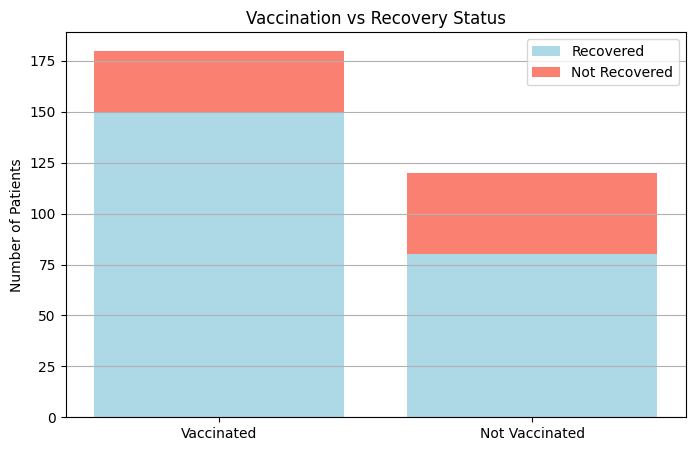

In [ ]:
plt.figure(figsize=(8, 5))
plt.title("Vaccination vs Recovery Status")
plt.bar(['Vaccinated', 'Not Vaccinated'], [150, 80], label='Recovered', color='lightblue')
plt.bar(['Vaccinated', 'Not Vaccinated'], [30, 40], label='Not Recovered', color='salmon', bottom=[150, 80])
plt.ylabel('Number of Patients')
plt.legend()
plt.grid(axis='y')
plt.show()

## 6. Chi-Square Test for Gender Preferences

### Creating Another Contingency Table
We analyze gender preferences regarding product purchases.


In [ ]:
# Create a contingency table for gender preferences in product purchases
data = np.array([[30, 10],   # Male Purchases/Not Purchases
                 [20, 30]]) # Female Purchases/Not Purchases

# Display the contingency table as a DataFrame for clarity
contingency_table = pd.DataFrame(data,
                                  columns=['Purchased', 'Not Purchased'],
                                  index=['Male', 'Female'])
print("Contingency Table:\n", contingency_table)

Contingency Table:
         Purchased  Not Purchased
Male           30             10
Female         20             30


### Performing the Chi-Square Test
We perform another Chi-Square test and visualize results.


Chi-Square Statistic: 9.6530625
P-Value: 0.001890361677058677
Degrees of Freedom: 1
Expected Frequencies:
 [[22.22222222 17.77777778]
 [27.77777778 22.22222222]]
Reject the null hypothesis: There is a significant association between gender and product preference.


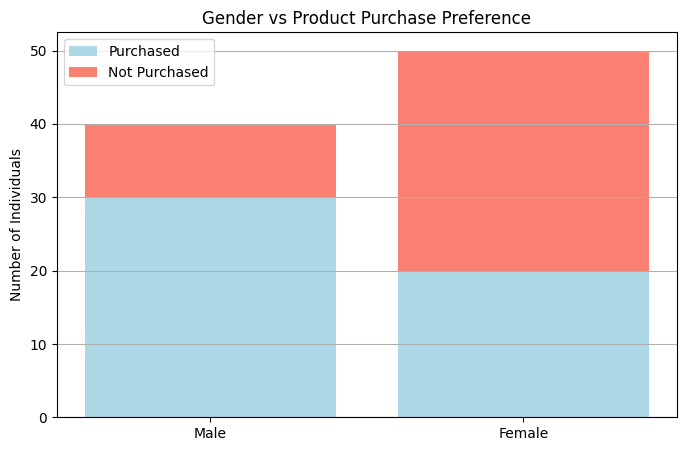

In [ ]:
# Perform the Chi-Square test on gender preference data
chi2_stat, p_value, dof, expected = chi2_contingency(data)

# Display results
print("\nChi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Determine significance level at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between gender and product preference.")
else:
    print("Fail to reject the null hypothesis: No significant association between gender and product preference.")

# (Optional) Plotting gender preference data too
plt.figure(figsize=(8, 5))
plt.title("Gender vs Product Purchase Preference")
plt.bar(['Male', 'Female'], [30,20], label='Purchased', color='lightblue')
plt.bar(['Male', 'Female'], [10,30], label='Not Purchased', color='salmon', bottom=[30 ,20])
plt.ylabel('Number of Individuals')
plt.legend()
plt.grid(axis='y')
plt.show()

For a full explanation of the code and concept, go [here](https://namitalearns.substack.com)